\newpage

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
heart_disease = fetch_ucirepo(id=45) 
heart = heart_disease.data.original
df = pd.DataFrame(heart)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Q1

This is a binary classification problem where we predict whether a patient has a heart disease (1) or not (0) based on 13 clinical features such as age and gender.

# Q2

In [2]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=[np.number]).columns
scale = StandardScaler()
df[numerical_cols] = scale.fit_transform(df[numerical_cols])

# Q3

In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

In [6]:
df[numerical_cols].skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.189352
thal        0.244447
num         1.058496
dtype: float64

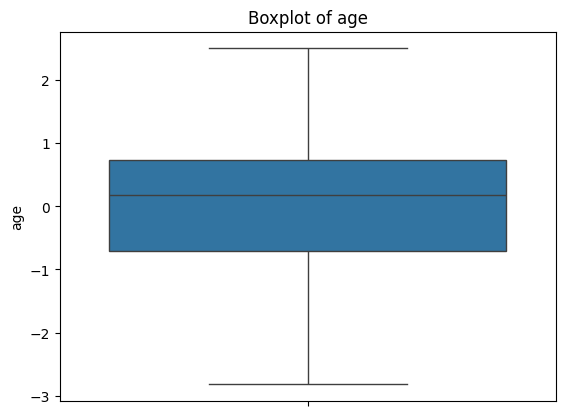

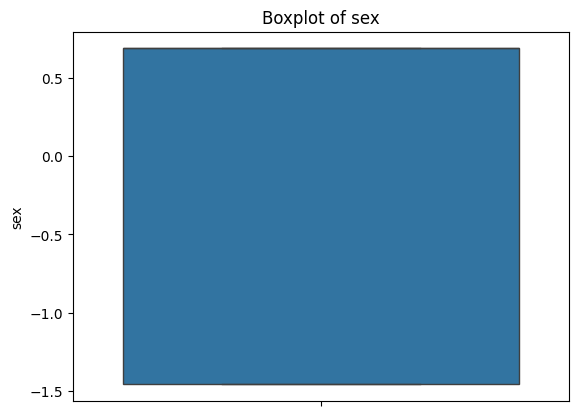

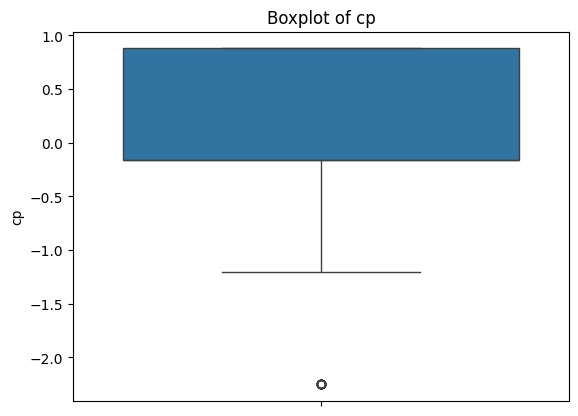

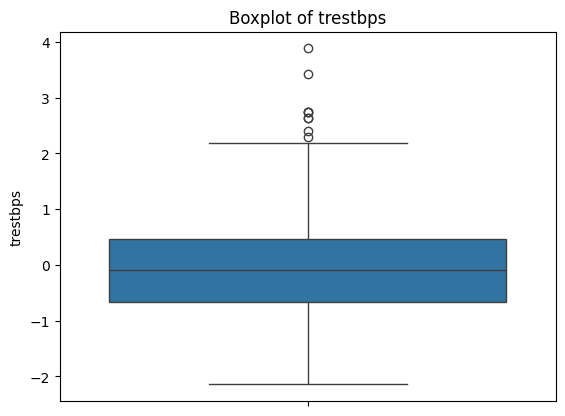

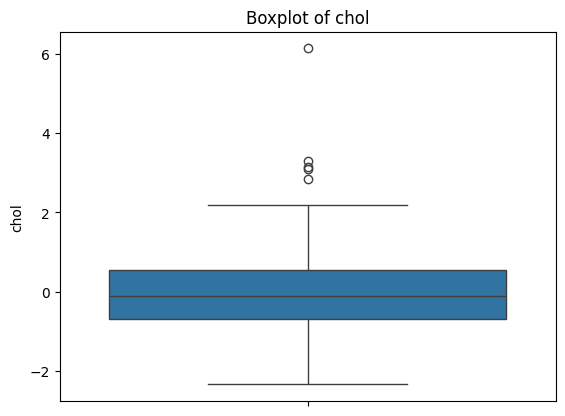

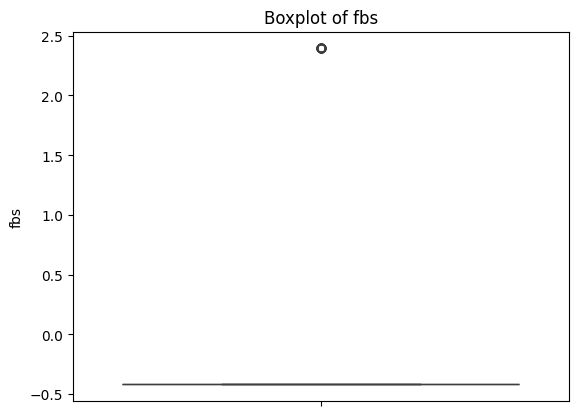

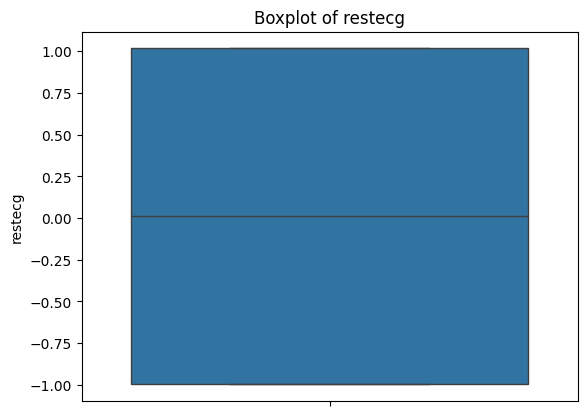

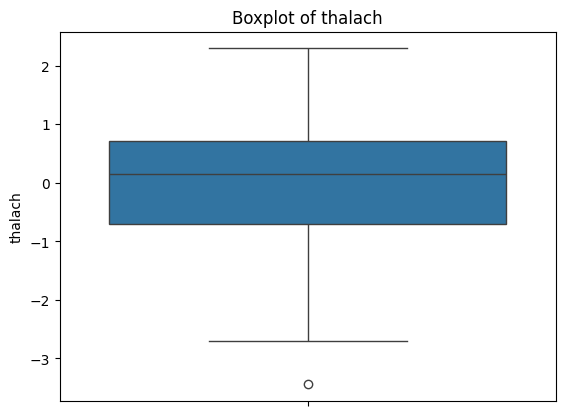

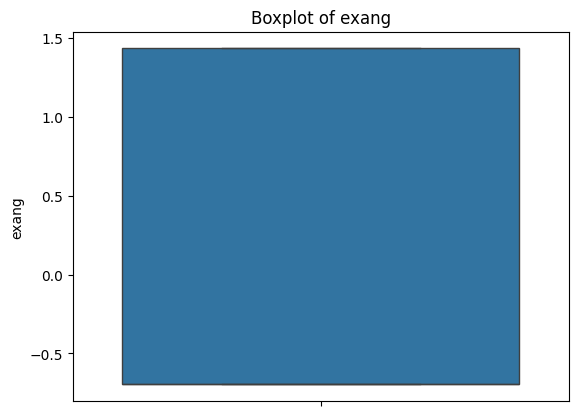

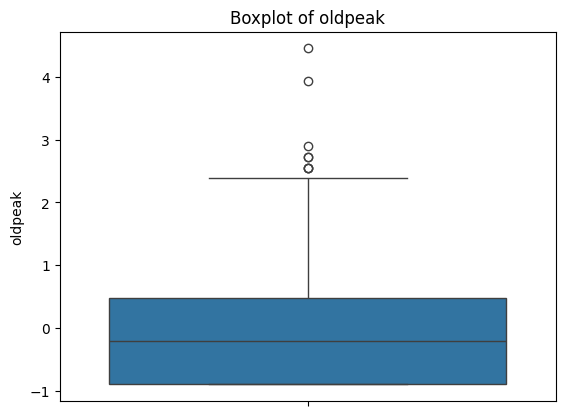

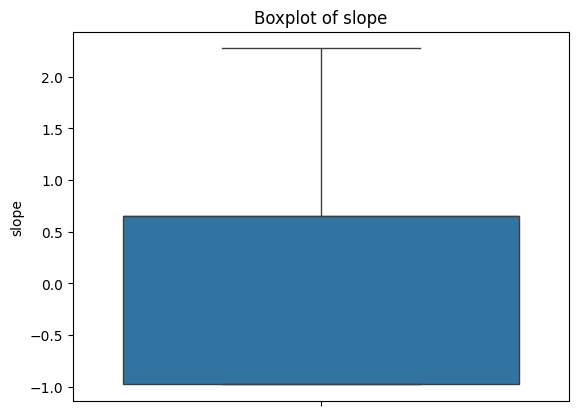

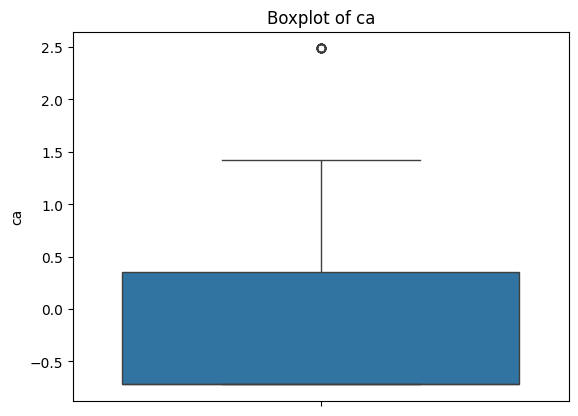

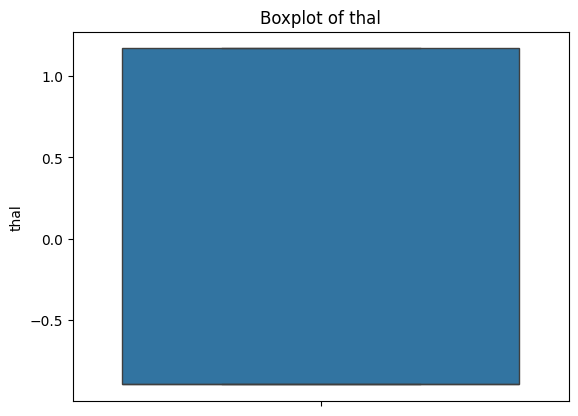

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
features = df.drop(columns='num')
for feature in features:
    plt.figure()
    sns.boxplot(data=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



The dataset has 303 observations and 14 variables. All features are numeric (int64 or float64). chol, oldpeak are right-skewed while most other features are roughly symmetric.

# Q4

In [8]:
df['num'] = np.where(df['num']>0,1,0)
df['num'].unique()

array([0, 1])

# Q5

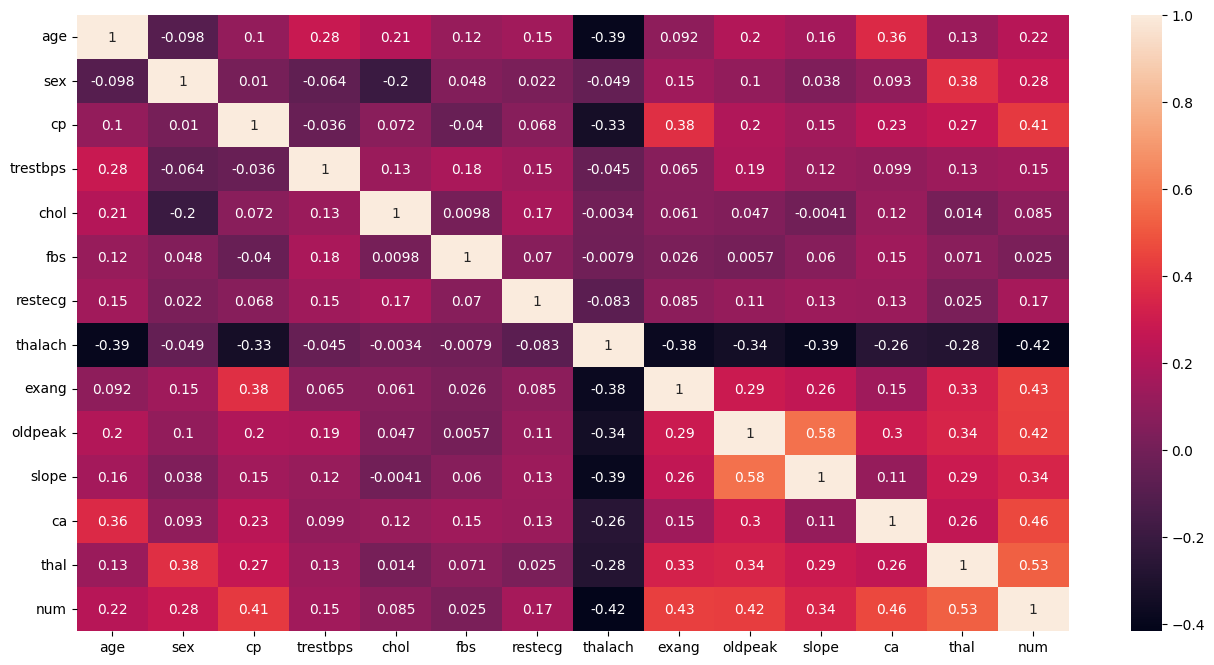

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

"thal" has the strongest positive correlation with num (0.53). The larger the Thalach, the higher the probability of developing heart disease, which can be considered as an important feature.

"thalach" is negatively correlated with num (-0.42), suggesting lower heart rate relates to disease presence.

"chol" and "restecg" have very weak correlation with num, and may be less informative.

# Q6

In [10]:
df.replace('?', np.nan, inplace=True)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
original_count = len(df)
df = df.dropna()  
missing_count = original_count - len(df)

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
print("Observation count after removing missing values:", len(df))

Observation count after removing missing values: 297


# Q7

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

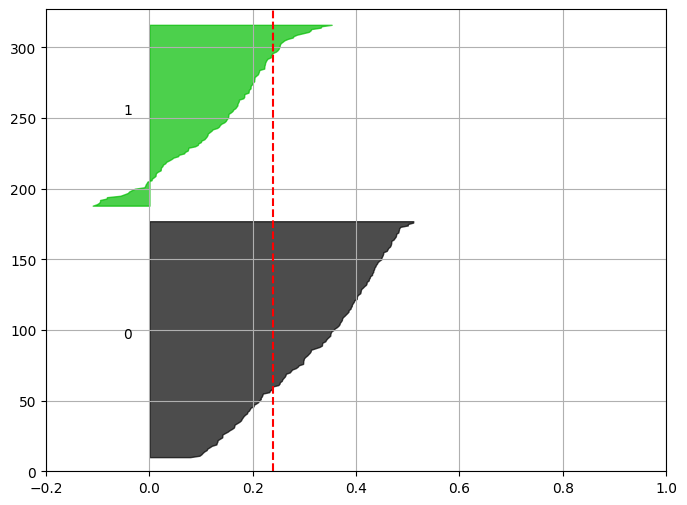

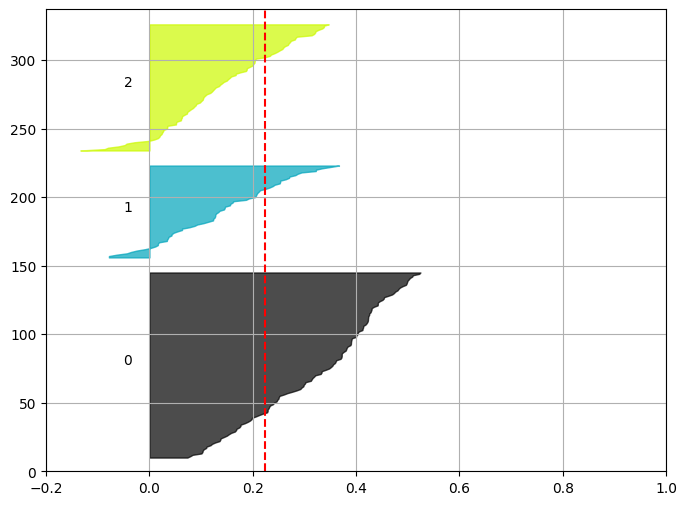

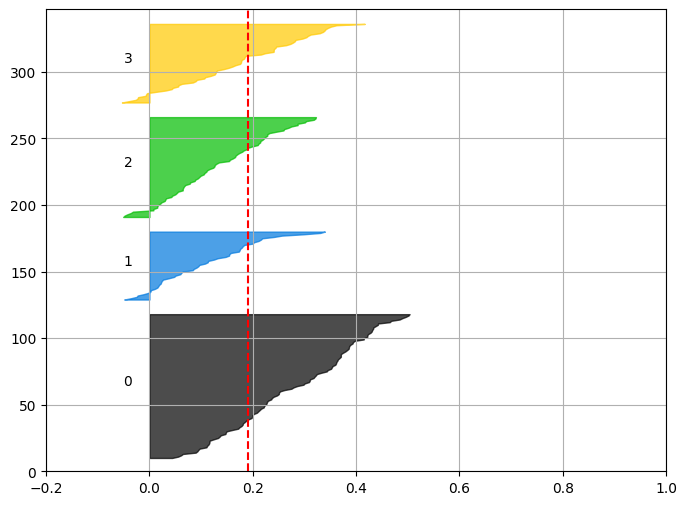

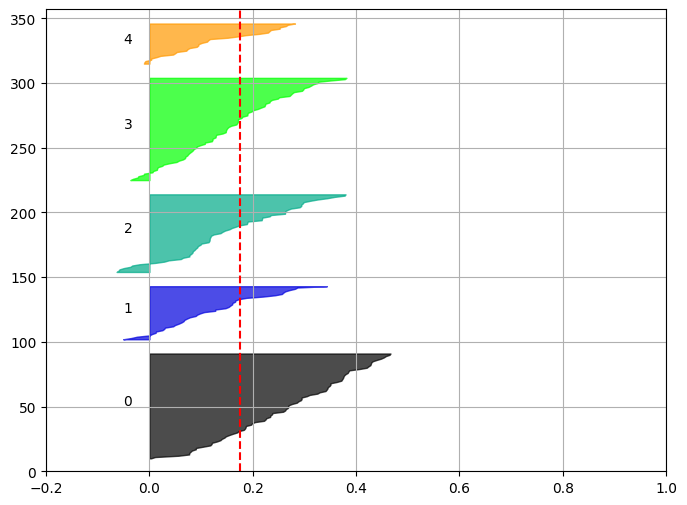

In [14]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
df_clean = df.dropna()
df_numeric = df_clean.drop(columns=categorical_cols, errors='ignore')
range_n_clusters = range(2, 6)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)
for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])
    ax1.grid(True)
    plt.show()


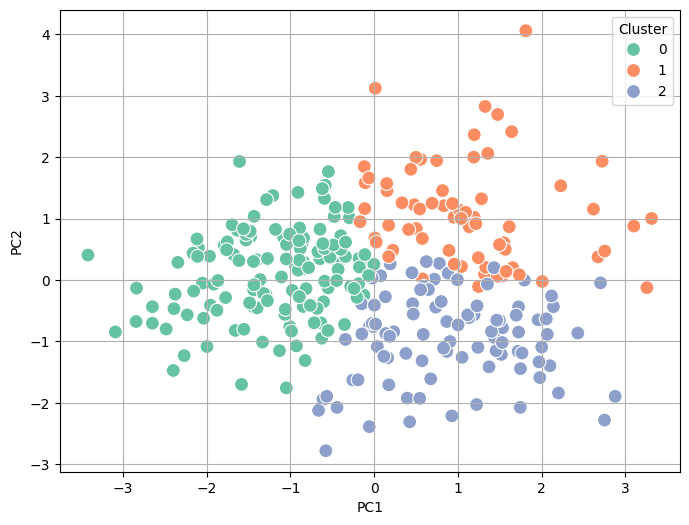

In [15]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
df_clean = df.dropna()
df_numeric = df_clean.drop(columns=categorical_cols, errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, 
                x='PC1', 
                y='PC2', 
                hue='Cluster', 
                palette='Set2', 
                s=100)
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# Q8

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop('num', axis=1)
y=df['num']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.3,
                                               random_state=1)

# Q9

Choose logistic regression and decision tree classifiers

Logistic regression is an interpretable model that uses coefficients to intuitively understand the direction and degree of the influence of features on the results

Decision tree classifiers can generate easily understandable decision rules and handle non-linear relationships well

# Q10

Select accuracy and recall rate


Accuracy: The proportion of correctly predicted samples to the total number of samples, calculated as (correctly predicted samples)/(total samples)

Recall rate: the proportion of actual positive samples that are correctly predicted as positive samples, calculated as (true cases)/(true cases+false negative cases)

# Q11

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X_train=X_train.fillna(X_train.mean(numeric_only=True))
X_test=X_test.fillna(X_test.mean(numeric_only=True))

logistic=LogisticRegression()
logistic.fit(X_train,y_train)

tree=DecisionTreeClassifier(random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

# Q12

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

selector=SelectKBest(score_func=f_classif, k=5)
X_train_selected=selector.fit_transform(X_train,y_train)
X_test_selected=selector.transform(X_test)
new_tree=DecisionTreeClassifier(random_state=1)
new_tree.fit(X_train_selected,y_train)

DecisionTreeClassifier(random_state=1)

# Q13

In [20]:
from sklearn.metrics import accuracy_score, recall_score

y_pred_logistic=logistic.predict(X_test)
y_pred_tree=tree.predict(X_test)
y_pred_new_tree=new_tree.predict(X_test_selected)
accuracy_logistic=accuracy_score(y_test,y_pred_logistic)
print(round(accuracy_logistic,2))
recall_logistic=recall_score(y_test,y_pred_logistic)
print(round(recall_logistic,2))
accuracy_tree=accuracy_score(y_test,y_pred_tree)
print(round(accuracy_tree,2))
recall_tree=recall_score(y_test,y_pred_tree)
print(round(recall_tree,2))
accuracy_new_tree=accuracy_score(y_test,y_pred_new_tree)
print(round(accuracy_new_tree,2))
recall_new_tree=recall_score(y_test,y_pred_new_tree)
print(round(recall_new_tree,2))

0.8
0.82
0.68
0.74
0.78
0.82


The logistic regression shows high accuracy(0.8) and recall rate(0.82). The original decision tree has lower accuracy(0.68) and recall rate(0.74).
However, the decision tree's accuracy increase to 0.78 after feature selection. Also, its recall rate reaches 0.82, which is on par with that of logistic regression. This indicates that feature selection can significantly enhance the performance of the decision tree model.

# Q14

In [21]:
coefficients=pd.DataFrame(logistic.coef_,columns=X_train.columns)
important=coefficients.loc[0].abs().sort_values(ascending=False).head(3)
print(important.index.tolist())

['ca', 'sex', 'fbs']


The most important predictor variables in logistic regression are 'ca', 'sex', 'fbs. The higher the 'ca' value, the more blood vessels in the coronary artery are blocked, and the probability of developing heart disease is positively correlated. The 'sex' variable shows that men are more likely to have heart disease than women. In the model, higher fbs values increase the predicted likelihood of heart disease.

# Q15

In [22]:
kmeans=KMeans(n_clusters=2, random_state=1)
subgroup_labels_train=kmeans.fit_predict(X_train)

subgroup1_mask_train=subgroup_labels_train==0
subgroup2_mask_train=subgroup_labels_train==1
X_train_subgroup1=X_train[subgroup1_mask_train]
y_train_subgroup1=y_train[subgroup1_mask_train]
X_train_subgroup2=X_train[subgroup2_mask_train]
y_train_subgroup2=y_train[subgroup2_mask_train]

tree_subgroup1=DecisionTreeClassifier(random_state=1)
tree_subgroup2=DecisionTreeClassifier(random_state=1)
tree_subgroup1.fit(X_train_subgroup1,y_train_subgroup1)
tree_subgroup2.fit(X_train_subgroup2,y_train_subgroup2)

subgroup_labels_test=kmeans.predict(X_test)
subgroup1_mask_test=subgroup_labels_test==0
subgroup2_mask_test=subgroup_labels_test==1
X_test_subgroup1=X_test[subgroup1_mask_test]
y_test_subgroup1=y_test[subgroup1_mask_test]
X_test_subgroup2=X_test[subgroup2_mask_test]
y_test_subgroup2=y_test[subgroup2_mask_test]

y_pred_subgroup1=tree_subgroup1.predict(X_test_subgroup1)
y_pred_subgroup2=tree_subgroup2.predict(X_test_subgroup2)

accuracy_subgroup1=accuracy_score(y_test_subgroup1,y_pred_subgroup1)
print(round(accuracy_subgroup1,2))
recall_subgroup1=recall_score(y_test_subgroup1,y_pred_subgroup1)
print(round(recall_subgroup1,2))
accuracy_subgroup2=accuracy_score(y_test_subgroup2,y_pred_subgroup2)
print(round(accuracy_subgroup2,2))
recall_subgroup2=recall_score(y_test_subgroup2,y_pred_subgroup2)
print(round(recall_subgroup2,2))

0.72
0.45
0.73
0.82


The accuracy and recall rate of the decision tree for subgroup1 are different from those of the orginal decision tree model. This is likely due to the fidderences in the data features of the subgroup. The performance of the decision tree for Subgroup 2 also shows discrepancies. This indicates that training a model for a subgroup can optimize its performance according to the characteristics of that subgroup.